In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_train.csv')
a=data.to_numpy()
a

array([[    0,     8,     0, ...,     0,     0,     0],
       [    1,     4,     0, ...,     0,     0,     0],
       [    2,     1,     0, ...,     0,     0,     0],
       ...,
       [29997,     9,     0, ...,     0,     0,     0],
       [29998,     4,     0, ...,     0,     0,     0],
       [29999,     6,     0, ...,     0,     0,     0]])

In [4]:
a.shape

(30000, 786)

In [5]:
x_t=a[:,range(2,a.shape[1])]
y_t=a[:,1]
x_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
x_t.shape

(30000, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

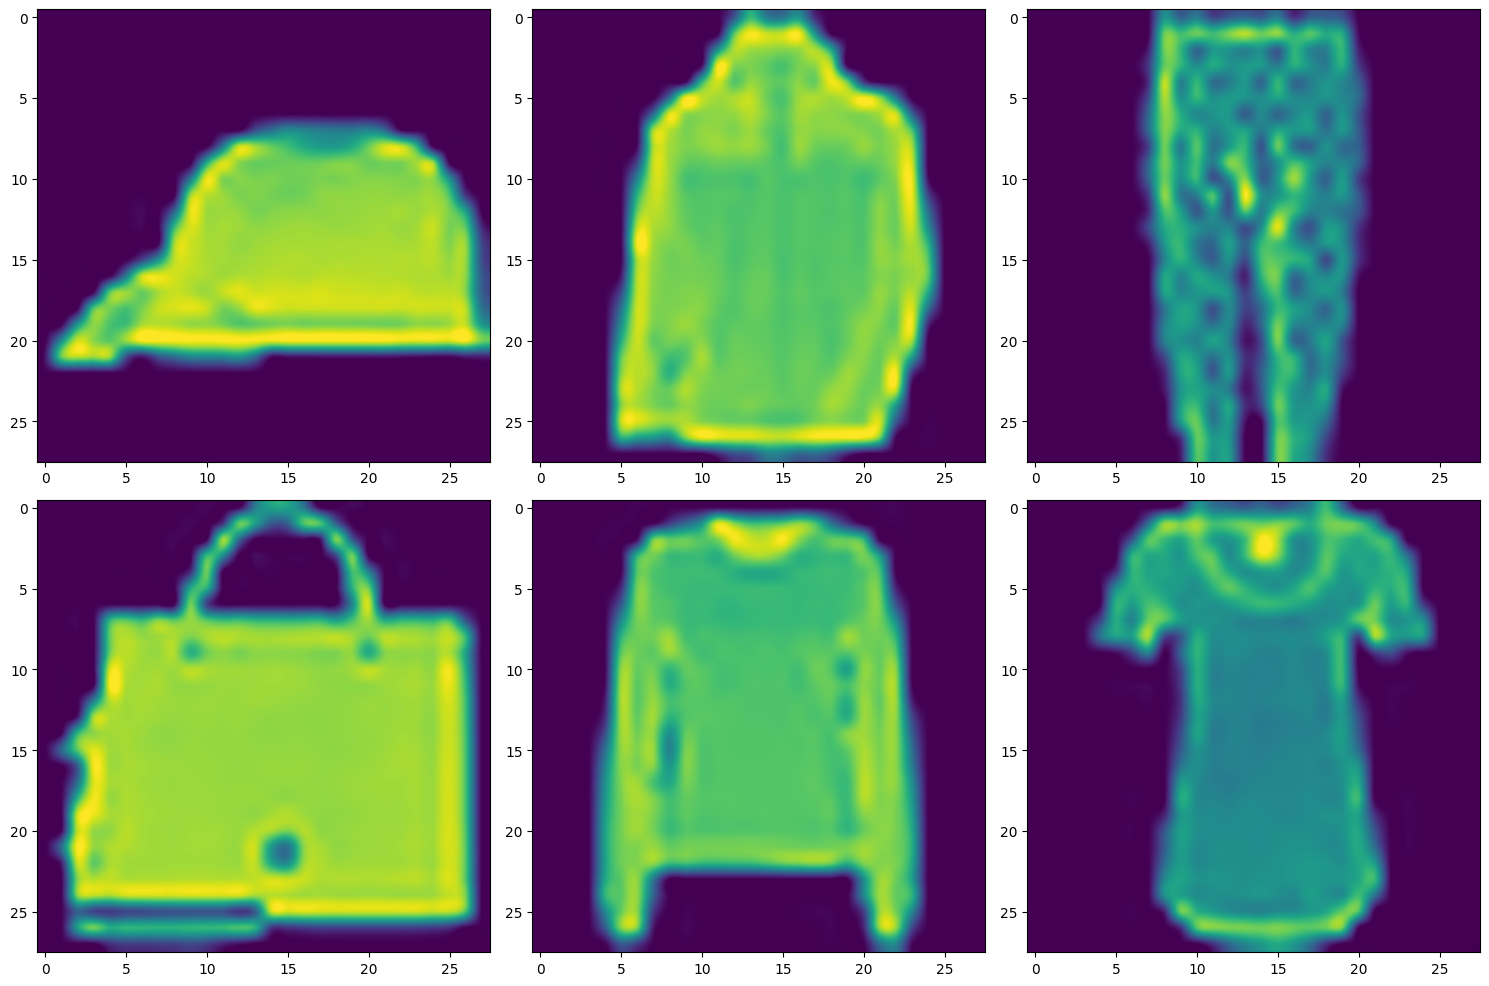

In [7]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_t[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [8]:
y_t

array([8, 4, 1, ..., 9, 4, 6])

In [9]:
y_t.shape

(30000,)

In [10]:
set(y_t)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
def normalize(dta):
  n=dta.shape[1]
  mean=np.zeros(n)
  dev=np.zeros(n)
  for j in range(n):
    mean[j]=np.mean(dta[:,j])
    dev[j]=np.std(dta[:,j])
  dta=(dta-mean)/dev
  return dta,mean,dev

In [12]:
x_train,mean_t,dev_t=normalize(x_t)

In [13]:
x_train

array([[-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       ...,
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399]])

In [14]:
x_train.shape

(30000, 784)

In [15]:
def transform(ar):
  op=np.zeros((10,ar.shape[0]))
  for i in range(ar.shape[0]):
    op[ar[i]][i]=1
  return op.T

In [16]:
y_train=transform(y_t)
print(y_train[range(5),:])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
def Relu(x):
  return max(x,0)

In [18]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [19]:
def cross_entropy(y,yhat):
  return -np.sum(np.multiply(y,np.log(yhat)))

In [20]:
alpha=0.000003
j_hist=[]
w_test=np.zeros((x_train.shape[1],10))
b_test=np.zeros(10)
print('Number of Iterations        Cost')
for i in range(1,20000):
  yhat=softmax(np.dot(x_train,w_test)+b_test)
  c=cross_entropy(y_train,yhat)
  j_hist.append(c)
  dj_dw=np.dot(x_train.T,yhat-y_train)
  dj_db=np.sum(yhat-y_train,axis=0)
  w_test-=alpha*dj_dw
  b_test-=alpha*dj_db
  if(i/2000 in range(11)):
    print('%11s'%i,'        ',c)

Number of Iterations        Cost
       2000          10791.718082669398
       4000          10199.652481328985
       6000          9880.980253392889
       8000          9668.515268939665
      10000          9511.504004704608
      12000          9388.198045646652
      14000          9287.41870745959
      16000          9202.70317768868
      18000          9129.989980575725


Text(0.5, 0, 'Number of Iterations')

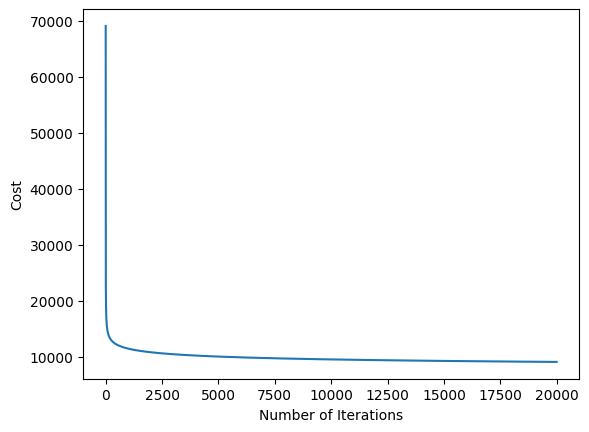

In [21]:
plt.plot(np.arange(len(j_hist)),j_hist)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

In [22]:
pred=np.argmax(softmax(np.dot(x_train,w_test)+b_test),axis=1)
pred

array([8, 4, 1, ..., 9, 4, 0])

In [23]:
np.mean(pred==y_t)*100

89.36333333333333

In [24]:
new_data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_test.csv')
new_a=new_data.to_numpy()
new_a

array([[25672,     0,     0, ...,     0,     0,     0],
       [59964,     0,     0, ...,     0,     0,     0],
       [66230,     0,     0, ...,     0,     0,     0],
       ...,
       [99226,     0,     0, ...,     0,     1,     0],
       [58519,     0,     1, ...,     0,     0,     0],
       [80458,     0,     0, ...,     0,     0,     0]])

In [25]:
new_a.shape

(10000, 785)

In [26]:
x_test=(new_a[:,range(1,785)]-mean_t)/dev_t

In [27]:
x_test

array([[-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       ...,
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
         0.02139962, -0.03516399],
       [-0.01100826,  5.78804212,  2.98188066, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399]])

In [28]:
y_test=np.argmax(softmax(np.dot(x_test,w_test)+b_test),axis=1)
y_test

array([0, 1, 2, ..., 8, 6, 1])

In [29]:
Predictions=new_data.drop(new_data.columns[[i for i in range(1,785)]], axis=1)
Predictions['Predicted']=y_test
Predictions.to_csv('/content/drive/MyDrive/WOC ML Data/NeuralNetwork_Predictions.csv', index=False)